## import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
import pandas as pd

import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix

from imblearn.over_sampling import ADASYN
import keras_costum_metric.Balanced_accuracy as ba
import keras_costum_metric.F1metric_keras as f1
import keras_custom_callback.Early_Stop_AccLoss as Stop_AL
import keras_custom_callback.Checkpoint_best_auc as Checkpoint_A
import joblib

import Set_model as model
import plot
import json

## dataset 

In [2]:
# Load the dataset
credit_df=pd.read_csv("..\\data\\new_german_credit.csv")
pd.set_option('display.max_columns', None)
credit_df.head(10)

,Unnamed: 0,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,Telephone
0,0,1,1,18,3,2,1049,1,1,4,1,2,21,2,1,1,2,1
1,1,1,1,9,3,0,2799,1,2,2,2,1,36,2,1,2,2,1
2,2,1,2,12,2,0,841,2,3,2,1,1,23,2,1,1,1,1
3,3,1,1,12,3,0,2122,1,2,3,2,1,39,2,1,2,1,1
4,4,1,1,12,3,0,2171,1,2,4,2,2,38,1,2,2,1,1
5,5,1,1,10,3,0,2241,1,1,1,2,1,48,2,1,2,1,1
6,6,1,1,8,3,0,3398,1,3,1,2,1,39,2,2,2,1,1
7,7,1,1,6,3,0,1361,1,1,2,2,1,40,2,2,1,1,1
8,8,1,3,18,3,3,1098,1,1,4,1,3,65,2,2,2,1,1
9,9,1,2,24,2,3,3758,3,1,1,1,4,23,2,1,1,1,1


In [3]:
X = credit_df.drop(columns=['Creditability', 'Unnamed: 0'])
Y = credit_df['Creditability']

In [4]:
np.shape(X)


(1000, 16)

In [5]:
np.shape(Y)

(1000,)

In [6]:
scaler = StandardScaler()
scaler.fit(X)
t_X = scaler.transform(X)
# t_X = np.array(X)

joblib.dump(scaler, 'neuralnetwork_scaler.joblib')
print("Scaler saved to standard_scaler.joblib")

Scaler saved to standard_scaler.joblib


In [7]:
print(t_X)

[[-1.41647598 -0.24085723  1.14143673 ... -0.76143209  0.12256562
  -0.82331789]
 [-1.41647598 -0.9875727   1.14143673 ...  1.31331475  0.12256562
  -0.82331789]
 [-0.21911674 -0.73866754 -0.47076204 ... -0.76143209 -1.53372651
  -0.82331789]
 ...
 [ 0.9782425   0.00804793  1.14143673 ... -0.76143209  1.77885774
   1.21459768]
 [-0.21911674 -0.73866754 -0.47076204 ... -0.76143209  1.77885774
   1.21459768]
 [-1.41647598  0.75476341 -0.47076204 ... -0.76143209  0.12256562
  -0.82331789]]


In [8]:
Y = np.array(Y)

## optimizer

In [9]:
# adam = keras.optimizers.Adam(learning_rate=0.0001)

In [10]:
loss = keras.losses.BinaryCrossentropy()

## metrics

In [11]:
metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall() , f1.F1Score(), keras.metrics.AUC(name='auc')]

## model

In [12]:
# model1 = model.model1(optimizer= adam, metric = metrics)

In [13]:
# model1.summary()

## kfold

Epoch 1/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.5000 - auc: 0.4492 - f1_score: 0.4286 - loss: 1.0244 - precision: 0.5000 - recall: 0.3750
Epoch 1: val_loss improved from inf to 0.93931, saving model to model\best_model_01.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4790 - auc: 0.4478 - f1_score: 0.3737 - loss: 1.0066 - precision: 0.4883 - recall: 0.2901 - val_accuracy: 0.4333 - val_auc: 0.6117 - val_f1_score: 0.3643 - val_loss: 0.9393 - val_precision: 0.7857 - val_recall: 0.2619
Epoch 2/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4688 - auc: 0.4575 - f1_score: 0.3684 - loss: 1.0370 - precision: 0.6250 - recall: 0.2632
Epoch 2: val_loss improved from 0.93931 to 0.86436, saving model to model\best_model_01.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4890 - auc: 0.4951 - f1_score: 0.3769 - loss: 0.9335 - precision: 0.5077 - recall: 0.3590 - val_accuracy: 0.5167 - val_auc: 0.6831 - val_f1_score: 0.4096 - val_loss: 0.8644 - val_p

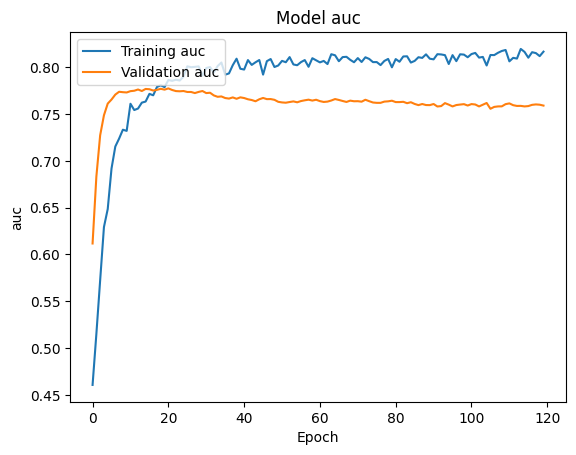

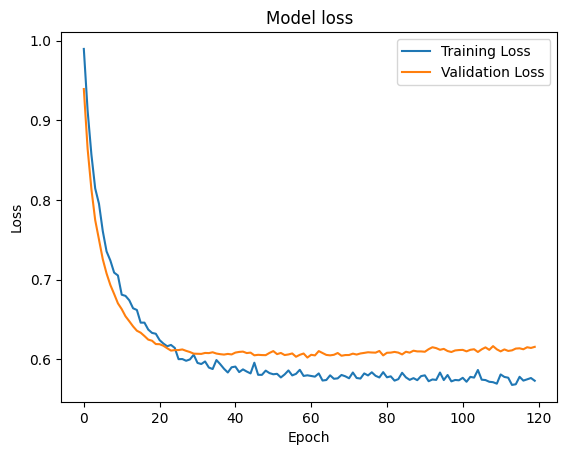

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


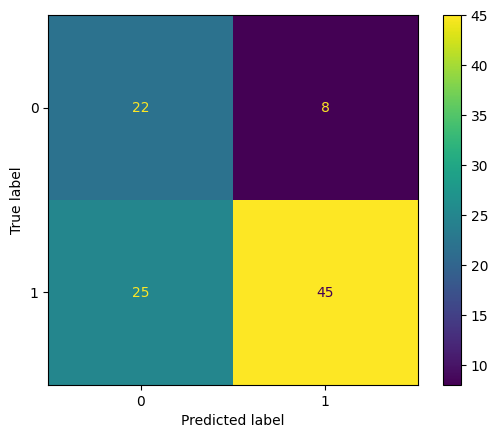

Epoch 1/600
 1/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.5938 - auc: 0.7104 - f1_score: 0.7347 - loss: 0.9725 - precision: 0.8047 - recall: 0.7103
Epoch 1: val_loss improved from inf to 0.82554, saving model to model\best_model_01.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5141 - auc: 0.5933 - f1_score: 0.7344 - loss: 1.0149 - precision: 0.6000 - recall: 0.7523 - val_accuracy: 0.6667 - val_auc: 0.5536 - val_f1_score: 0.7340 - val_loss: 0.8255 - val_precision: 0.7260 - val_recall: 0.8413
Epoch 2/600
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6875 - auc: 0.6765 - f1_score: 0.7340 - loss: 0.8742 - precision: 0.6190 - recall: 0.8667
Epoch 2: val_loss improved from 0.82554 to 0.79893, saving model to model\best_model_01.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5436 - auc: 0.5758 - f1_score: 0.7337 - loss: 0.9400 - precision: 0.5270 - recall: 0.7734 - val_accuracy: 0.6889 - val_auc: 0.6060 - val_f1_score: 0.7333 - val_loss: 0.7989 - val_p

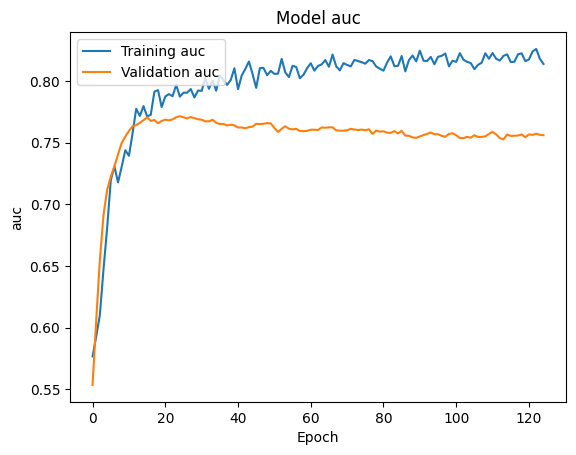

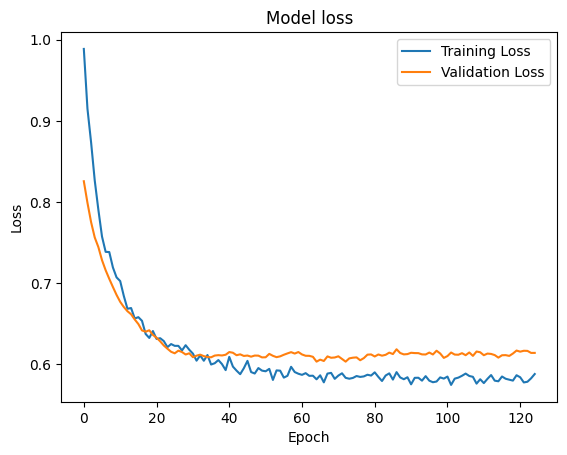

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


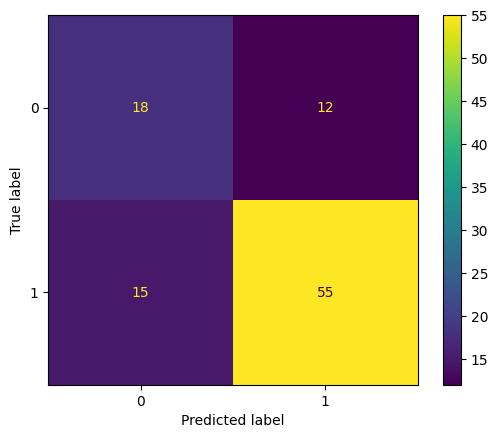

Epoch 1/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.6875 - auc: 0.7168 - f1_score: 0.7381 - loss: 0.8945 - precision: 0.8214 - recall: 0.7823
Epoch 1: val_loss improved from inf to 0.76104, saving model to model\best_model_01.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5449 - auc: 0.6124 - f1_score: 0.7380 - loss: 0.9825 - precision: 0.6146 - recall: 0.8499 - val_accuracy: 0.7111 - val_auc: 0.6566 - val_f1_score: 0.7378 - val_loss: 0.7610 - val_precision: 0.7342 - val_recall: 0.9206
Epoch 2/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6250 - auc: 0.6607 - f1_score: 0.7378 - loss: 0.8288 - precision: 0.6071 - recall: 0.9444
Epoch 2: val_loss improved from 0.76104 to 0.73589, saving model to model\best_model_01.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5591 - auc: 0.6202 - f1_score: 0.7377 - loss: 0.8976 - precision: 0.5436 - recall: 0.8512 - val_accuracy: 0.7111 - val_auc: 0.7151 - val_f1_score: 0.7375 - val_loss: 0.7359 - val_p

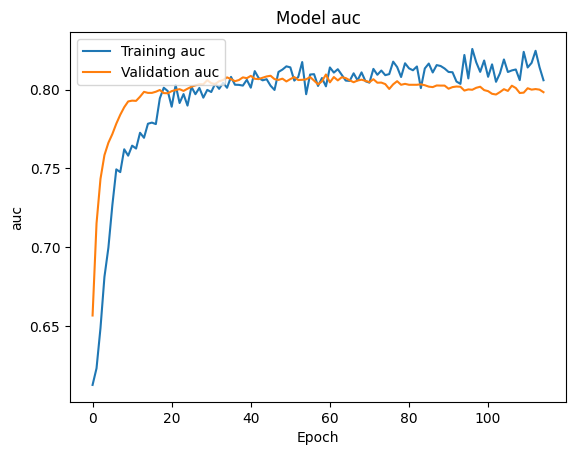

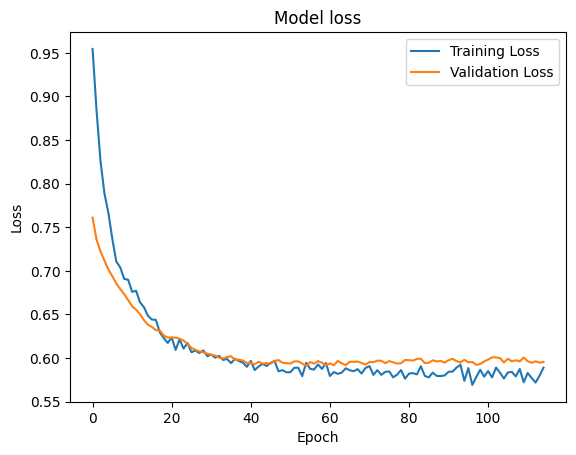

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002124E2B27A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


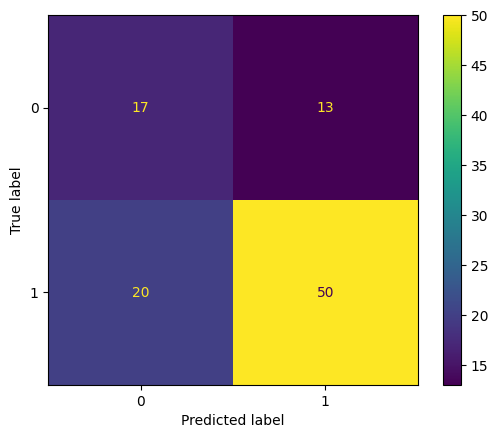

Epoch 1/600
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5126 - auc: 0.6190 - f1_score: 0.7419 - loss: 0.9937 - precision: 0.6322 - recall: 0.6121
Epoch 1: val_loss improved from inf to 0.92071, saving model to model\best_model_01.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5135 - auc: 0.6154 - f1_score: 0.7418 - loss: 0.9920 - precision: 0.6279 - recall: 0.6084 - val_accuracy: 0.5222 - val_auc: 0.5445 - val_f1_score: 0.7415 - val_loss: 0.9207 - val_precision: 0.7222 - val_recall: 0.5159
Epoch 2/600
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5964 - auc: 0.6268 - f1_score: 0.7414 - loss: 0.8897 - precision: 0.6262 - recall: 0.5663 
Epoch 2: val_loss improved from 0.92071 to 0.84924, saving model to model\best_model_01.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5959 - auc: 0.6255 - f1_score: 0.7413 - loss: 0.8903 - precision: 0.6245 - recall: 0.5660 - val_accuracy: 0.5889 - val_auc: 0.6240 - val_f1_score: 0.7411 - val_loss: 0.8492 - val_p

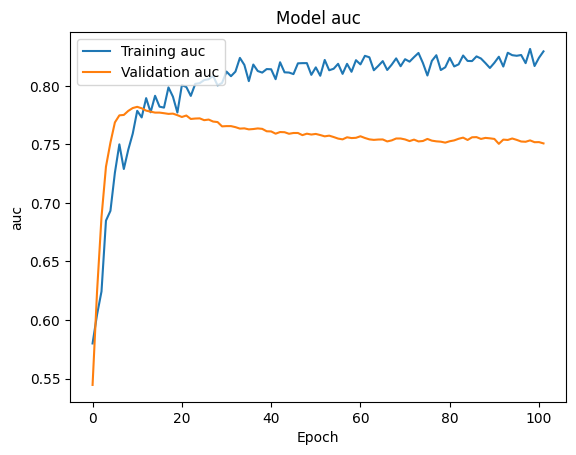

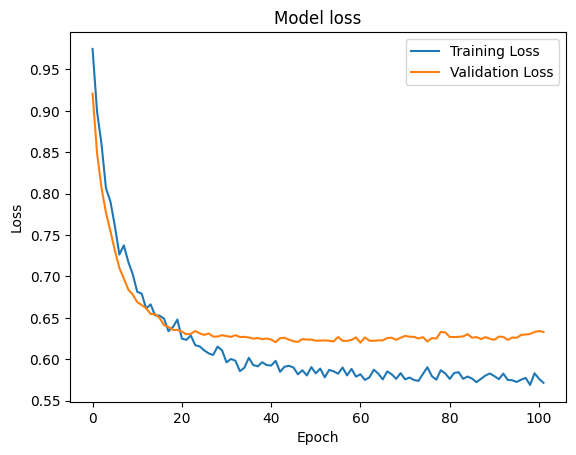

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


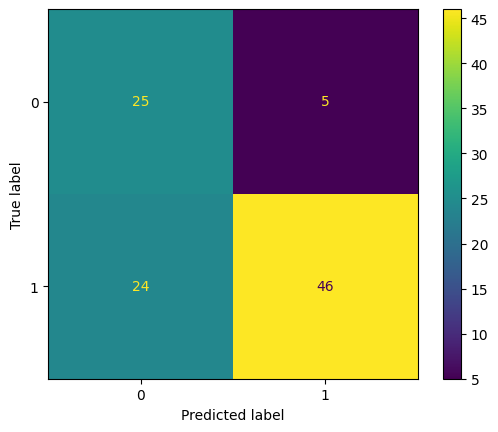

Epoch 1/600
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4779 - auc: 0.5807 - f1_score: 0.7412 - loss: 0.9985 - precision: 0.6183 - recall: 0.6633
Epoch 1: val_loss improved from inf to 0.84269, saving model to model\best_model_01.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.4817 - auc: 0.5798 - f1_score: 0.7412 - loss: 0.9950 - precision: 0.6136 - recall: 0.6636 - val_accuracy: 0.6167 - val_auc: 0.5748 - val_f1_score: 0.7410 - val_loss: 0.8427 - val_precision: 0.7317 - val_recall: 0.7143
Epoch 2/600
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5634 - auc: 0.5826 - f1_score: 0.7409 - loss: 0.9057 - precision: 0.5714 - recall: 0.6502 
Epoch 2: val_loss improved from 0.84269 to 0.81023, saving model to model\best_model_01.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5645 - auc: 0.5841 - f1_score: 0.7409 - loss: 0.9042 - precision: 0.5700 - recall: 0.6496 - val_accuracy: 0.6000 - val_auc: 0.6573 - val_f1_score: 0.7407 - val_loss: 0.8102 - val_p

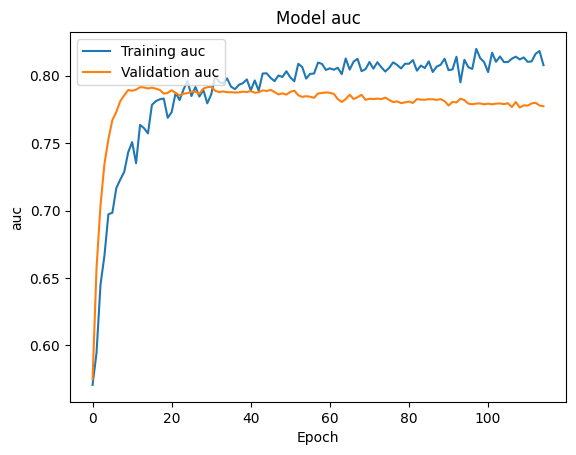

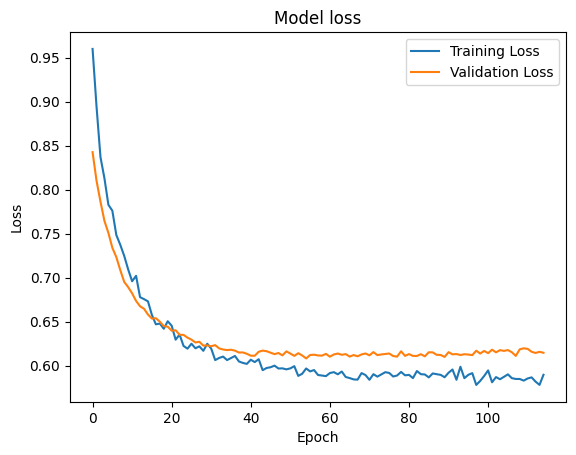

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


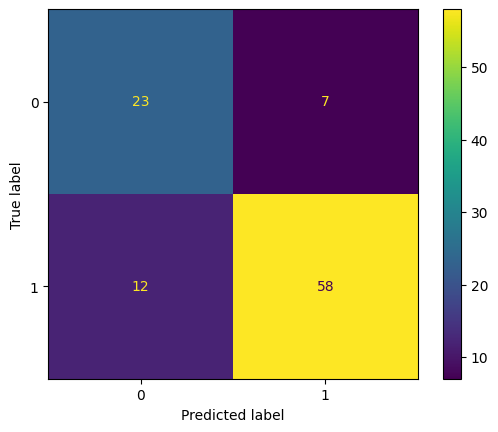

Epoch 1/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.4688 - auc: 0.7372 - f1_score: 0.7395 - loss: 1.1176 - precision: 0.8305 - recall: 0.6853
Epoch 1: val_loss improved from inf to 0.96236, saving model to model\best_model_01.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4578 - auc: 0.5747 - f1_score: 0.7394 - loss: 1.0783 - precision: 0.6284 - recall: 0.4899 - val_accuracy: 0.4389 - val_auc: 0.5303 - val_f1_score: 0.7391 - val_loss: 0.9624 - val_precision: 0.6812 - val_recall: 0.3730
Epoch 2/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5312 - auc: 0.4844 - f1_score: 0.7390 - loss: 1.0690 - precision: 0.5714 - recall: 0.2500
Epoch 2: val_loss improved from 0.96236 to 0.88408, saving model to model\best_model_01.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5336 - auc: 0.5494 - f1_score: 0.7389 - loss: 0.9729 - precision: 0.6010 - recall: 0.4275 - val_accuracy: 0.5222 - val_auc: 0.6113 - val_f1_score: 0.7387 - val_loss: 0.8841 - val_p

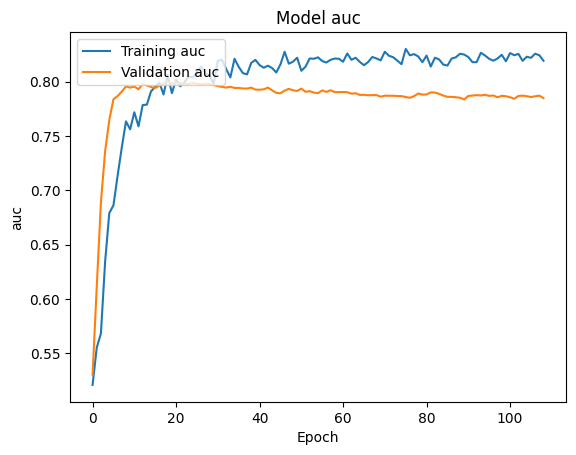

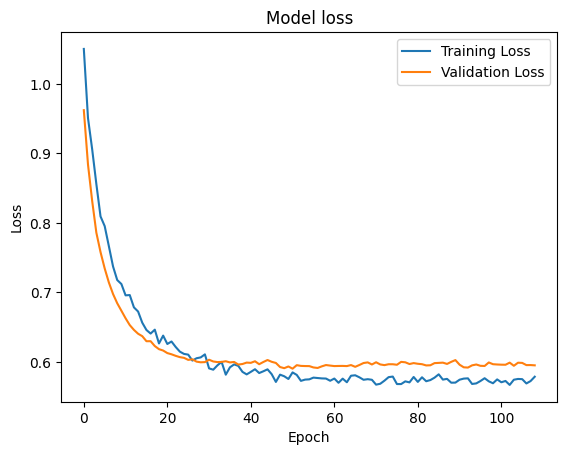

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


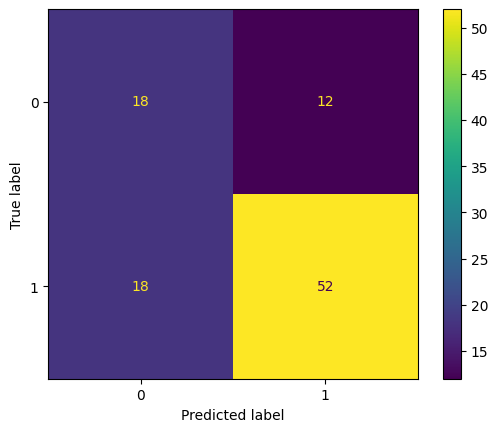

Epoch 1/600
 1/32 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.5938 - auc: 0.7541 - f1_score: 0.7408 - loss: 0.9949 - precision: 0.8435 - recall: 0.6783
Epoch 1: val_loss improved from inf to 0.94035, saving model to model\best_model_01.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4702 - auc: 0.5910 - f1_score: 0.7407 - loss: 0.9988 - precision: 0.6214 - recall: 0.5122 - val_accuracy: 0.4389 - val_auc: 0.4662 - val_f1_score: 0.7404 - val_loss: 0.9404 - val_precision: 0.6623 - val_recall: 0.4048
Epoch 2/600
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5312 - auc: 0.4392 - f1_score: 0.7404 - loss: 1.0227 - precision: 0.5000 - recall: 0.4000
Epoch 2: val_loss improved from 0.94035 to 0.88923, saving model to model\best_model_01.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5087 - auc: 0.5082 - f1_score: 0.7403 - loss: 0.9347 - precision: 0.5147 - recall: 0.4373 - val_accuracy: 0.4889 - val_auc: 0.5253 - val_f1_score: 0.7401 - val_loss: 0.8892 - val_p

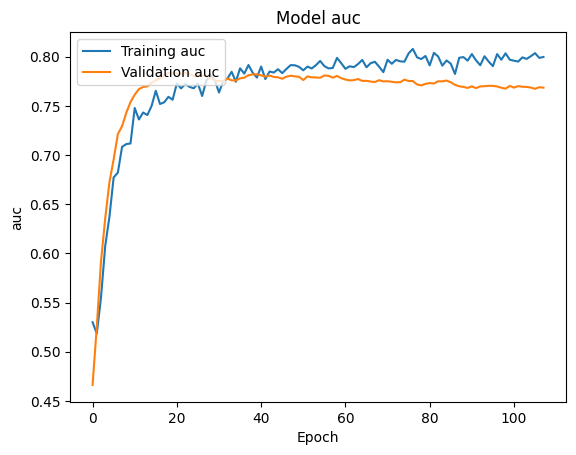

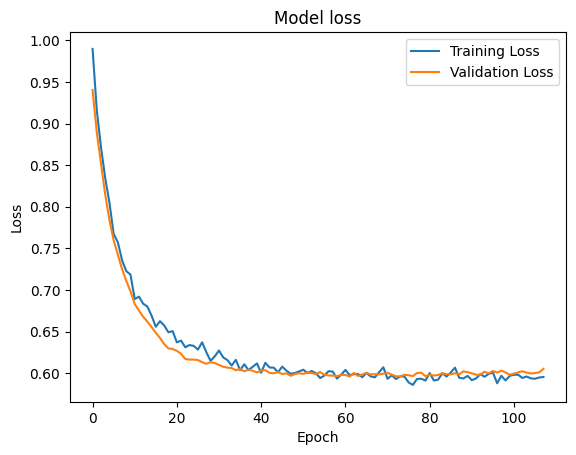

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


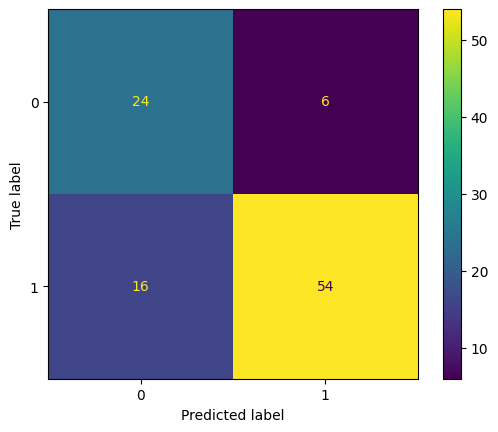

Epoch 1/600
 1/32 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.5625 - auc: 0.7274 - f1_score: 0.7383 - loss: 1.0030 - precision: 0.7786 - recall: 0.7183
Epoch 1: val_loss improved from inf to 0.99829, saving model to model\best_model_01.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5125 - auc: 0.5853 - f1_score: 0.7383 - loss: 1.0388 - precision: 0.6096 - recall: 0.5998 - val_accuracy: 0.4833 - val_auc: 0.4211 - val_f1_score: 0.7381 - val_loss: 0.9983 - val_precision: 0.6602 - val_recall: 0.5397
Epoch 2/600
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5000 - auc: 0.5333 - f1_score: 0.7381 - loss: 0.9763 - precision: 0.5263 - recall: 0.5882
Epoch 2: val_loss improved from 0.99829 to 0.91729, saving model to model\best_model_01.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5441 - auc: 0.5512 - f1_score: 0.7380 - loss: 0.9548 - precision: 0.5525 - recall: 0.5630 - val_accuracy: 0.5056 - val_auc: 0.4899 - val_f1_score: 0.7378 - val_loss: 0.9173 - val_p

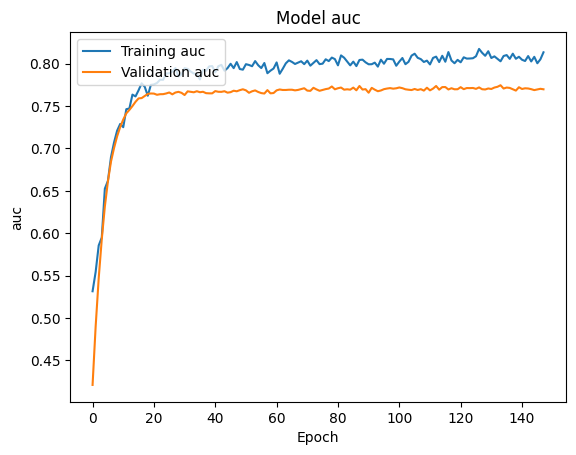

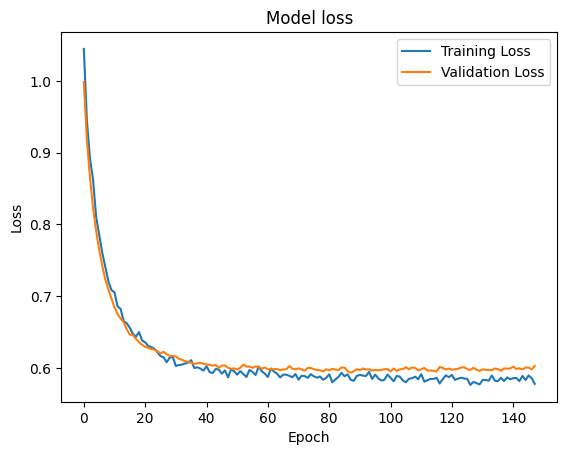

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


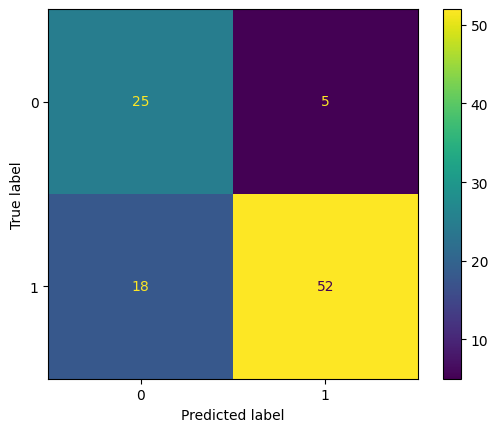

Epoch 1/600
 1/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.5625 - auc: 0.7705 - f1_score: 0.7363 - loss: 1.0848 - precision: 0.8684 - recall: 0.6781
Epoch 1: val_loss improved from inf to 0.99632, saving model to model\best_model_01.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5104 - auc: 0.6656 - f1_score: 0.7363 - loss: 1.0287 - precision: 0.7285 - recall: 0.4337 - val_accuracy: 0.4389 - val_auc: 0.6604 - val_f1_score: 0.7361 - val_loss: 0.9963 - val_precision: 0.7778 - val_recall: 0.2778
Epoch 2/600
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5625 - auc: 0.6073 - f1_score: 0.7360 - loss: 0.9532 - precision: 0.8571 - recall: 0.3158
Epoch 2: val_loss improved from 0.99632 to 0.90190, saving model to model\best_model_01.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5346 - auc: 0.5930 - f1_score: 0.7360 - loss: 0.9289 - precision: 0.5781 - recall: 0.3203 - val_accuracy: 0.5333 - val_auc: 0.6908 - val_f1_score: 0.7358 - val_loss: 0.9019 - val_p

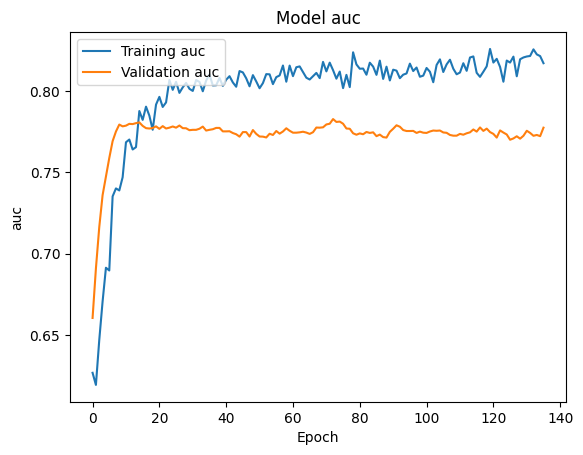

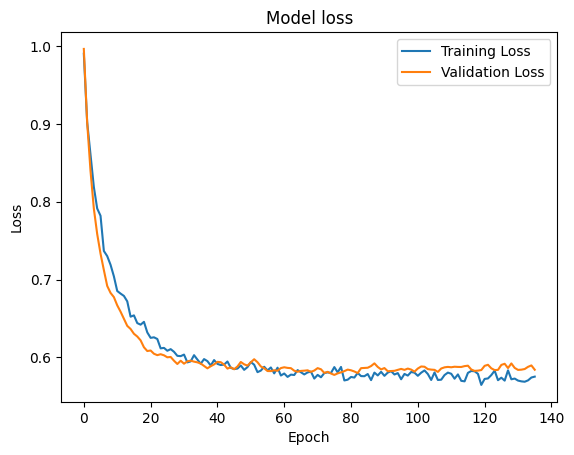

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


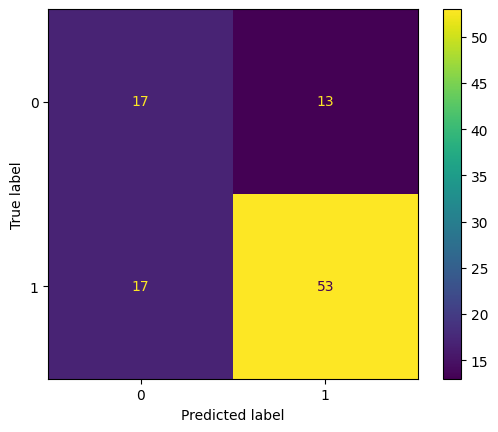

Epoch 1/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.5000 - auc: 0.7374 - f1_score: 0.7385 - loss: 1.0116 - precision: 0.7985 - recall: 0.7535
Epoch 1: val_loss improved from inf to 0.95762, saving model to model\best_model_01.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5142 - auc: 0.6068 - f1_score: 0.7385 - loss: 1.0185 - precision: 0.6427 - recall: 0.5926 - val_accuracy: 0.4500 - val_auc: 0.4720 - val_f1_score: 0.7383 - val_loss: 0.9576 - val_precision: 0.6667 - val_recall: 0.4286
Epoch 2/600
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5000 - auc: 0.5061 - f1_score: 0.7383 - loss: 1.0108 - precision: 0.4211 - recall: 0.6154
Epoch 2: val_loss improved from 0.95762 to 0.89150, saving model to model\best_model_01.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5110 - auc: 0.5304 - f1_score: 0.7383 - loss: 0.9588 - precision: 0.5239 - recall: 0.4828 - val_accuracy: 0.5611 - val_auc: 0.5628 - val_f1_score: 0.7381 - val_loss: 0.8915 - val_p

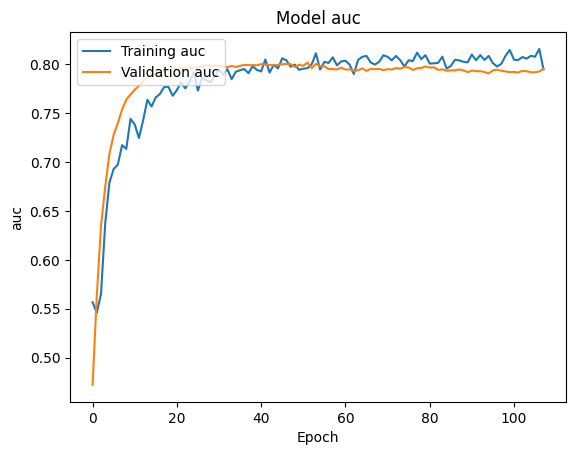

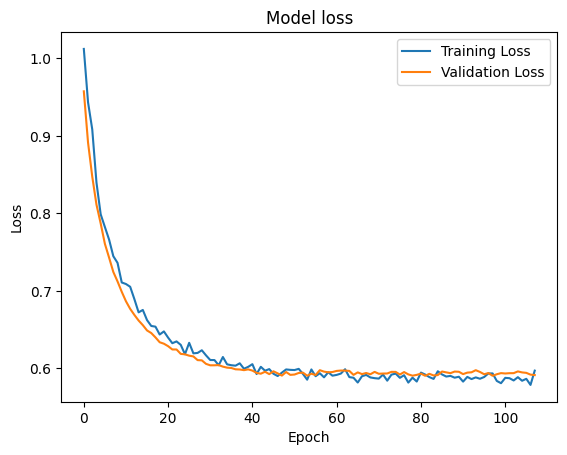

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


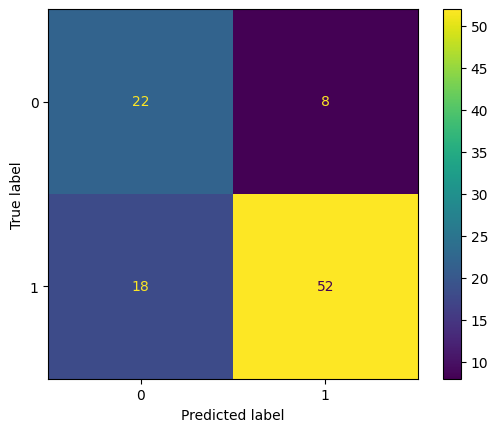

Average Accuracy: 0.727999997138977
Standard Deviation of CV accuracy:  0.04467660948891591
Average Precision: 0.8552349030971527
Standard Deviation of CV precision:  0.04302101482606361
Average Recall: 0.738571435213089
Standard Deviation of CV recall:  0.05308829616570235
Average F1-Score: 0.8307709217071533
Standard Deviation of CV F1:  0.037159742404631046
Average ROC-AUC: 0.7734047532081604
Standard Deviation of CV roc_auc:  0.04999784264569646


In [14]:
adasyn = ADASYN(random_state=200)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=169)

# Initialize metrics lists
accuracies_1 = []
precisions_1 = []
recalls = []
f1_scores_1 = []
roc_aucs_1 = []
# true_negatives = []
# balance_accuracies_1 = []
conf_mas = []

# Perform KFold cross-validation
for train_index, test_index in kf.split(t_X, Y):
    X_train, X_test = t_X[train_index], t_X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=120)

    adam1_5 = keras.optimizers.Adam(learning_rate=0.001)

    model1_5 = model.model1(optimizer=adam1_5, metric=metrics, loss=loss)

    X_adasyn, y_adasyn = adasyn.fit_resample(X_train_split, y_train_split)

    early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=60,
    verbose=1,
    mode="min",
    )

    checkpoint = keras.callbacks.ModelCheckpoint(
    filepath = 'model\\best_model_01.keras',
    monitor= "val_loss",
    verbose=1,
    mode="min",
    save_best_only=True,  # Save only the best model based on the monitored metric
    save_weights_only=False,  # Save the full model (set to True to save only the weights)
    save_freq='epoch'  # Save the model at the end of every epoch
    )
    

    history = model1_5.fit(X_adasyn, y_adasyn, epochs=600, validation_data=(X_val, y_val), callbacks = [early_stopping, checkpoint])

    best_model_1 = load_model('model\\best_model_01.keras')

    loss_and_metrics = best_model_1.evaluate(X_test, y_test)
    print(loss_and_metrics)
    print('Loss = ',loss_and_metrics[0])
    accuracies_1.append(loss_and_metrics[1])
    precisions_1.append(loss_and_metrics[2])
    recalls.append(loss_and_metrics[3])
    # balance_accuracies_1.append(loss_and_metrics[3])
    f1_scores_1.append(loss_and_metrics[4])
    roc_aucs_1.append(loss_and_metrics[5])
    # true_negatives.append(loss_and_metrics[6])
    

    # plot.plotAccuracy(history)
    plot.plotAUC(history)

    plot.plotLoss(history)

    conf_ma = plot.plotConfusionMatrix(model= best_model_1, X_test=X_test, y_test=y_test)
    conf_mas.append(conf_ma)



# Calculate the average of the metrics
average_accuracy = np.mean(accuracies_1)
average_precision = np.mean(precisions_1) 
average_recall = np.mean(recalls)
# average_B_accuracy = np.mean(balance_accuracies_1)
average_f1_score = np.mean(f1_scores_1)
average_roc_auc = np.mean(roc_aucs_1)
# average_true_negative = np.mean(true_negatives)
# Compute the average confusion matrix
avg_cm = np.mean(conf_mas, axis=0)


# Display the metrics
print(f"Average Accuracy: {average_accuracy}")
print("Standard Deviation of CV accuracy: ", np.std(accuracies_1))
print(f"Average Precision: {average_precision}")
print("Standard Deviation of CV precision: ", np.std(precisions_1))
print(f"Average Recall: {average_recall}")
print("Standard Deviation of CV recall: ", np.std(recalls))
# print(f"Average Balanced accuracy: {average_B_accuracy}")
# print("Standard Deviation of CV Balanced accuracy5tlor49: ", np.std(balance_accuracies_1))
print(f"Average F1-Score: {average_f1_score}")
print("Standard Deviation of CV F1: ", np.std(f1_scores_1))
print(f"Average ROC-AUC: {average_roc_auc}")
print("Standard Deviation of CV roc_auc: ", np.std(roc_aucs_1))
# print(f"Average true negative: {average_true_negative}")
# print("Standard Deviation of CV true_negative: ", np.std(true_negatives))


results = {
    'acc': average_accuracy,
    'precision': average_precision,
    'recall': average_recall,
    'f1': average_f1_score,
    'auc': average_roc_auc,
    'confusion_matrix' : avg_cm.tolist()
    }

with open('NeuralNetwork_result.json', 'w') as json_file:
        json.dump(results, json_file, indent=4)

## Model 2 layers

In [15]:
# adasyn = ADASYN(random_state=200)

# kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=96)

# # Initialize metrics lists
# accuracies_2 = []
# precisions_2 = []
# # recalls = []
# f1_scores_2 = []
# roc_aucs_2 = []
# # true_negatives = []
# balance_accuracies_2 = []

# # Perform KFold cross-validation
# for train_index, test_index in kf.split(t_X, Y):
#     X_train, X_test = t_X[train_index], t_X[test_index]
#     y_train, y_test = Y[train_index], Y[test_index]

#     X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=200)

#     adam2_5 = keras.optimizers.Adam(learning_rate=0.0001)

#     model2_5 = model.model2(optimizer=adam2_5, metric=metrics, loss=loss)

#     X_adasyn, y_adasyn = adasyn.fit_resample(X_train_split, y_train_split)

#     # early_stopping = Stop_AL.EarlyStopAccLoss(
#     # min_delta=0.001,
#     # min_delta_loss = 0.01,
#     # patience_auc=100,
#     # verbose=1,
#     # )

#     # checkpoint = Checkpoint_A.CheckpointBestAUC(min_delta_loss = 0.01)

#     early_stopping = keras.callbacks.EarlyStopping(
#     monitor="val_loss",
#     min_delta=0.001,
#     patience=60,
#     verbose=1,
#     mode="min",
#     )

#     checkpoint = keras.callbacks.ModelCheckpoint(
#     filepath = 'model\\best_model_02.keras',
#     monitor= "val_loss",
#     verbose=1,
#     mode="min",
#     save_best_only=True,  # Save only the best model based on the monitored metric
#     save_weights_only=False,  # Save the full model (set to True to save only the weights)
#     save_freq='epoch'  # Save the model at the end of every epoch
#     )
    

    
#     history = model2_5.fit(X_adasyn, y_adasyn, epochs=700, validation_data=(X_val, y_val), callbacks = [early_stopping, checkpoint])

#     best_model_2 = load_model('model\\best_model_02.keras')

#     loss_and_metrics = best_model_2.evaluate(X_test, y_test)
#     print(loss_and_metrics)
#     print('Loss = ',loss_and_metrics[0])
#     accuracies_2.append(loss_and_metrics[1])
#     precisions_2.append(loss_and_metrics[2])
#     # recalls.append(loss_and_metrics[3])
#     balance_accuracies_2.append(loss_and_metrics[3])
#     f1_scores_2.append(loss_and_metrics[4])
#     roc_aucs_2.append(loss_and_metrics[5])
#     # true_negatives.append(loss_and_metrics[6])
    

#     plot.plotAccuracy(history)
#     plot.plotAUC(history)
#     plot.plotLoss(history)

#     plot.plotConfusionMatrix(model= best_model_2, X_test=X_test, y_test=y_test)


# # Calculate the average of the metrics
# average_accuracy = np.mean(accuracies_2)
# average_precision = np.mean(precisions_2)
# # average_recall = np.mean(recalls)
# average_B_accuracy = np.mean(balance_accuracies_2)
# average_f1_score = np.mean(f1_scores_2)
# average_roc_auc = np.mean(roc_aucs_2)
# # average_true_negative = np.mean(true_negatives)


# # Display the metrics
# print(f"Average Accuracy: {average_accuracy}")
# print("Standard Deviation of CV accuracy: ", np.std(accuracies_2))
# print(f"Average Precision: {average_precision}")
# print("Standard Deviation of CV precision: ", np.std(precisions_2))
# # print(f"Average Recall: {average_recall}")
# # print("Standard Deviation of CV recall: ", np.std(recalls))
# print(f"Average Balanced accuracy: {average_B_accuracy}")
# print("Standard Deviation of CV Balanced accuracy: ", np.std(balance_accuracies_2))
# print(f"Average F1-Score: {average_f1_score}")
# print("Standard Deviation of CV F1: ", np.std(f1_scores_2))
# print(f"Average ROC-AUC: {average_roc_auc}")
# print("Standard Deviation of CV roc_auc: ", np.std(roc_aucs_2))
# # print(f"Average true negative: {average_true_negative}")
# # print("Standard Deviation of CV true_negative: ", np.std(true_negatives))